In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 hand written images

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalizing data
x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_train, axis= 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2628 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1074 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0718 - accuracy: 0.9771


In [3]:
val_loss, val_acc = model.evaluate(x_test, y_train)
print(val_loss, val_acc)

1875/1875 [==============================] - 2s 860us/step - loss: 0.0565 - accuracy: 0.9829
0.05647837743163109 0.9829333424568176


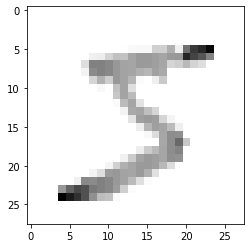

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [5]:
model.save('mnist_model')

INFO:tensorflow:Assets written to: mnist_model\assets


INFO:tensorflow:Assets written to: mnist_model\assets


In [8]:
model = tf.keras.models.load_model('mnist_model')

In [12]:
import numpy as np
predictions = model.predict([x_test])

1875/1875 [==============================] - 2s 800us/step


In [13]:
np.argmax(predictions[0])

5

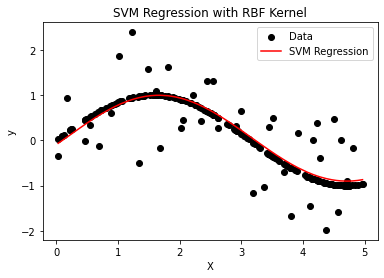

In [11]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(X.shape[0]//5))

# Fit regression model using SVM with RBF kernel
svm_regressor = SVR(kernel='rbf', C=1e4, gamma=0.1)
svm_regressor.fit(X, y)

# Predict values for input data
y_pred = svm_regressor.predict(X)

# Plot the results
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_pred, color='red', label='SVM Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVM Regression with RBF Kernel')
plt.legend()
plt.show()